# 1.) Import the data from CCLE into a new Google Colab file

In [74]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [75]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [77]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/insurance.csv")

# 2.) Split the data into 80/20, in/out sample

In [78]:
df.loc[df["sex"] =="female","sex"] = 1
df.loc[df["sex"] =="male","sex"] = 0
df.loc[df["smoker"] == "yes","smoker"] = 1.
df.loc[df["smoker"] == "no","smoker"] = 0.

df.loc[df["region"] == "southwest","region"] = 1.
df.loc[df["region"] == "southeast","region"] = 2.
df.loc[df["region"] == "northwest","region"] = 3.
df.loc[df["region"] == "northeast","region"] = 4.

In [79]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1.0,1.0,16884.92400
1,18,0,33.770,1,0.0,2.0,1725.55230
2,28,0,33.000,3,0.0,2.0,4449.46200
3,33,0,22.705,0,0.0,3.0,21984.47061
4,32,0,28.880,0,0.0,3.0,3866.85520


In [80]:
import numpy as np

In [81]:
data = np.array(df.iloc[:,:6])
target = np.array(df.iloc[:, -1])

In [82]:
cut = int((len(data)* .8 // 1))

In [83]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [84]:
from sklearn import preprocessing

In [85]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)


# 4.) Get lambda from Lasso cross validation

In [86]:
from sklearn.linear_model import LassoCV

In [87]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [88]:
a1 = modCV.alpha_
print(a1)

133.34880015958146


In [89]:
modCV = LassoCV().fit(out_data_scale, out_target)

In [90]:
a2 = modCV.alpha_
print(a2)

118.95754102834297


# 5.) Run a lambda regression with that Lambda

In [91]:
from sklearn.linear_model import Lasso

In [92]:
mod1 = Lasso(alpha = a1).fit(in_data_scale, in_target)

In [93]:
mod2 = Lasso(alpha = a2).fit(out_data_scale, out_target)

# 6.) Visualize the coefficients 

In [94]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138,  326.52198757])

In [95]:
mod2.coef_

array([3397.61699996,  -90.90555313, 1841.53832194,  583.1451853 ,
       9696.19181096,    0.        ])

In [96]:
coef1 = mod1.coef_
coef2 = mod2.coef_

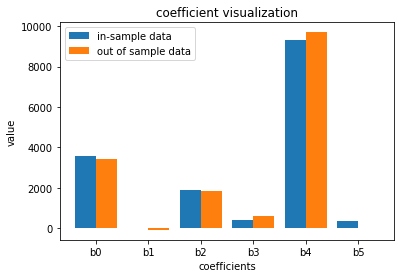

In [97]:
x = ['b0','b1','b2','b3','b4','b5']
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, coef1, 0.4, label = 'in-sample data')
plt.bar(x_axis + 0.2, coef2, 0.4, label = 'out of sample data')
plt.xticks(x_axis, x)
plt.xlabel("coefficients")
plt.ylabel ("value")
plt.title("coefficient visualization")
plt.legend()
plt.show()

# 7.) Interpret the coefficients

From the graph above, we see that the results from in-sample data are similar to the results from out of sample data. Holding other variables constant, if age increases by 1 year, then the insurance will increase by about $3500. The insurance is going to increase by $200 if body mass index increases by 1 unit. 

# 8.) Compare in and out of sample MSE’s

In [71]:
mod1.predict(np.array(in_data_scale))

array([24933.78011265,  3864.47297708,  6815.10290666, ...,
       12177.79520243, 11741.14195836, 12360.55112834])

In [72]:
mod2.predict(np.array(out_data_scale))

array([ 3.42602387e+04,  1.41187813e+04,  3.96599668e+03,  1.19758729e+04,
        9.24608851e+03,  6.41342410e+03,  1.07486276e+04,  2.38384844e+03,
        2.99754093e+04,  1.62578417e+04,  1.35474464e+03,  6.06385352e+03,
        5.11842683e+03,  7.17362831e+03,  1.43878057e+04,  3.08332948e+04,
        1.14479515e+04,  1.27053687e+04,  1.68984198e+04,  9.60654064e+03,
        3.59079528e+04,  1.15249989e+04,  6.35262469e+03,  2.79637925e+04,
        1.34528337e+04,  5.04962495e+03,  3.72940079e+04,  4.96791060e+03,
        1.11203392e+04,  6.06321747e+03,  2.81634940e+04,  1.23220246e+04,
        8.70539686e+03,  1.43204597e+04,  7.37122785e+03,  1.17115887e+04,
        1.01115864e+04,  1.02089631e+04,  5.27724423e+03,  7.90099067e+03,
        1.25220107e+04,  3.58792029e+04,  3.43038289e+04,  5.43919056e+03,
        2.40431342e+03,  1.30562606e+04,  1.07314830e+04,  3.07328461e+04,
        3.28990855e+04,  3.99257262e+03,  2.85069591e+04,  1.30478618e+04,
        3.88395111e+04,  